### Softmax - Used at the output layer for categorical problems (>2 outputs)

In [1]:
import math
z = [1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0]
z_exp = [math.exp(i) for i in z]
print([round(i, 2) for i in z_exp])
sum_z_exp = sum(z_exp)
print(round(sum_z_exp, 2))

softmax = [round(i / sum_z_exp, 3) for i in z_exp]
''' Taking the exponent of each individual obs of 
    z_exp and dividing it by the sum of z_exp'''
print(softmax)




[2.72, 7.39, 20.09, 54.6, 2.72, 7.39, 20.09]
114.98
[0.024, 0.064, 0.175, 0.475, 0.024, 0.064, 0.175]


###  Cross Entropy - Loss function 

In [2]:
import numpy as np
def BinaryCrossEntropy(yHat, y):
    if yHat == 1:
        return -np.log(y)
    else:
        return -np.log(1 - y)

print(BinaryCrossEntropy(1,.9))

#or
y = [1,0,0]
yhat = [.9,.1,0]
-(np.log(yhat[y==1]))
#^ This makes more sense to me

yhat = [0.9,0.1,0.0]
y = [1,0,0]
''' Could work for cat cross entropy'''
-np.log(yhat[y==1])
yhat[y==1]


0.10536051565782628


0.9

In [3]:
# Example assuming 3 class problme - Softmax

y = [[0,1,0],[1,0,0]]
x = [[1,6.1,2.8],[1,5.7,3.8]] #Add first index as 1
weights = [[.01,.1,.1],[.1,.2,.3], [.1,.2,.3]] #weights with bias
bias = [.01,.1,.1]
''' Note that we are adding the bias into a separate list within the weights +
    we are adding an index ==1 into the first index position of each of the feature matrices'''

inputs =np.dot(x,weights)

z_exp = [np.exp(i) for i in inputs]

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=0)

probs = []
for i in inputs:
    probs.append(softmax(i))

predicted_class = [np.argmax(i) for i in probs]
actual_class = [np.argmax(i) for i in y] 

print(np.shape(x))
print(np.shape(weights))
probs
inputs
x
weights

(2, 3)
(3, 3)


[[0.01, 0.1, 0.1], [0.1, 0.2, 0.3], [0.1, 0.2, 0.3]]

In [4]:
yhat = [np.max(i) for i in probs]

for i,j,k in zip(probs, y, yhat):
    print("Predicted Class : {} | Actual Class: {} | Confidence {}".format(np.argmax(i), np.argmax(j), k))
    
    


Predicted Class : 2 | Actual Class: 1 | Confidence 0.6390677118387396
Predicted Class : 2 | Actual Class: 0 | Confidence 0.656410709302666


# Softmax 


In [5]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
import keras
from keras.utils import to_categorical

iris = sklearn.datasets.load_iris()

X = iris.data
y = iris.target

xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2)

model = LogisticRegression()
model.fit(xtrain, ytrain)
coeff = model.coef_
index = 20
rang = range(len(xtrain))

inputs = np.dot(coeff, xtrain[index]) #First observation

z_i = [np.exp(i) for i in inputs]
sum_z_j = np.sum(z_i)

probs = []
for i in z_i:
    probs.append(i/sum_z_j)
    
probs1 = [ '%.4f' % elem for elem in probs ]   
print("Handmade|Obs.: {}|softmax output {} | predicted class: {} |actual class : {}".format(index, probs1, np.argmax(probs), 2))
print("Sklearn|Obs. : {}|softmax output {} | predicted class: {} |actual class : {}".format(index, model.predict_proba(xtrain)[index],model.predict(xtrain)[index], 2))



OHE = to_categorical(ytrain)

def cat_loss(ground_truth_index):
    return -(np.log(probs[ground_truth_index]*1))

print("handmade loss: {}".format(cat_loss(2)))
#Index 1 corresponds with the correct index prediction



C:\Users\jdine\Documents\Anaconda3\envs\tensorflowlatest\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Handmade|Obs.: 20|softmax output ['0.0011', '0.0504', '0.9485'] | predicted class: 2 |actual class : 2
Sklearn|Obs. : 20|softmax output [0.00583777 0.37177217 0.62239006] | predicted class: 2 |actual class : 2
handmade loss: 0.05286768955279724


## Putting it all together w/ the iris set

#### Hide


In [6]:
iris = sklearn.datasets.load_iris()
X = iris.data
y = iris.target
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2)


theta = np.zeros(xtrain.shape[1])
z = np.dot(xtrain, theta)

rang = range(len(xtrain))

inputs = []
learning_rate = .01
epochs = 1000
fit_intercept = True

theta = np.zeros(xtrain.shape[1])
z = np.dot(xtrain, theta)


def add_intercept(X):
    intercept = np.ones((X.shape[0],1))
    return np.concatenate((intercept, X), axis=1)
if fit_intercept == True:    
    X = add_intercept(X)

y_actual_OHE = [np.argmax(i) for i in to_categorical(ytrain)]

##LOSS + COST FUNCTION
loss = []
for i,j in zip(probs, y_actual_OHE):
    loss.append(-np.log(i[j]))  
cost = np.mean(loss)

for r in rang:
    inputs.append(np.dot(coeff, xtrain[r])) #First observation

    
    
#Softmax
probs = [[np.exp(j)/sum(np.exp(i)) for j in i] for i in inputs]
predicted_class = [np.argmax(i) for i in probs]
print(cost)
accuracy_score(ytrain, predicted_class)


IndexError: invalid index to scalar variable.

#### EG

In [38]:
#Load Data

iris = sklearn.datasets.load_iris()
x = iris.data
y = iris.target
print("Shape of X:{}".format(np.shape(x)))
print("Shape of Y:{}".format(np.shape(y)))

y_enc = (np.arange(np.max(y) + 1) == y[:, None]).astype(float)

#Three possible outcomes (Multiclass)
w = ([[0,0,0], 
      [0,0,0], 
      [0,0,0]])

bias = ([[0,0,0]])

z = x.dot((w)+bias)

def softmax(z):
    return (np.exp(z.T) / np.sum(np.exp(z), axis=1)).T

smax = softmax(z)

def to_classlabel(z):
    return z.argmax(axis=1)

predicted_label = to_classlabel(smax)




z


smax - y_enc[0]

np.sum(- np.sum(np.log(smax) * (y_enc), axis=1))

z

Shape of X:(150, 4)
Shape of Y:(150,)


array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0

https://github.com/rasbt/python-machine-learning-book/blob/master/code/bonus/softmax-regression.ipynb

In [11]:
# Sebastian Raschka 2016
# Implementation of the mulitnomial logistic regression algorithm for
# classification.

# Author: Sebastian Raschka <sebastianraschka.com>
#
# License: BSD 3 clause

import numpy as np
from time import time
#from .._base import _BaseClassifier
#from .._base import _BaseMultiClass


class SoftmaxRegression(object):
    def __init__(self, eta=0.01, epochs=50,
                 l2=0.0,
                 minibatches=1,
                 n_classes=None,
                 random_seed=None):

        self.eta = eta
        self.epochs = epochs
        self.l2 = l2
        self.minibatches = minibatches
        self.n_classes = n_classes
        self.random_seed = random_seed
    def _fit(self, X, y, init_params=True):
        if init_params:
            if self.n_classes is None:
                self.n_classes = np.max(y) + 1
            self._n_features = X.shape[1]

            self.b_, self.w_ = self._init_params(
                weights_shape=(self._n_features, self.n_classes),
                bias_shape=(self.n_classes,),
                random_seed=self.random_seed)
            self.cost_ = []
        y_enc = self._one_hot(y=y, n_labels=self.n_classes, dtype=np.float)
        for i in range(self.epochs):
            for idx in self._yield_minibatches_idx(
                    n_batches=self.minibatches,
                    data_ary=y,
                    shuffle=True):
                # givens:
                # w_ -> n_feat x n_classes
                # b_  -> n_classes

                # net_input, softmax and diff -> n_samples x n_classes:
                net = self._net_input(X[idx], self.w_, self.b_)
                softm = self._softmax(net)
                diff = softm - y_enc[idx]
                mse = np.mean(diff, axis=0)

                # gradient -> n_features x n_classes
                grad = np.dot(X[idx].T, diff)
                
                # update in opp. direction of the cost gradient
                self.w_ -= (self.eta * grad +
                            self.eta * self.l2 * self.w_)
                self.b_ -= (self.eta * np.sum(diff, axis=0))
            # compute cost of the whole epoch
            net = self._net_input(X, self.w_, self.b_)
            softm = self._softmax(net)
            cross_ent = self._cross_entropy(output=softm, y_target=y_enc)
            cost = self._cost(cross_ent)
            self.cost_.append(cost)
        return self
    def fit(self, X, y, init_params=True):
        if self.random_seed is not None:
            np.random.seed(self.random_seed)
        self._fit(X=X, y=y, init_params=init_params)
        self._is_fitted = True
        return self
    def _predict(self, X):

        probas = self.predict_proba(X)
        return self._to_classlabels(probas)
    def predict(self, X):
        if not self._is_fitted:
            raise AttributeError('Model is not fitted, yet.')
        return self._predict(X)
    def predict_proba(self, X):
        net = self._net_input(X, self.w_, self.b_)
        softm = self._softmax(net)
        return softm
    def _net_input(self, X, W, b):
        return (X.dot(W) + b)
    def _softmax(self, z):

        return (np.exp(z.T) / np.sum(np.exp(z), axis=1)).T
    def _cross_entropy(self, output, y_target):

        return - np.sum(np.log(output) * (y_target), axis=1)
    def _cost(self, cross_entropy):
        
        L2_term = self.l2 * np.sum(self.w_ ** 2)
        cross_entropy = cross_entropy + L2_term
        return 0.5 * np.mean(cross_entropy)
    def _to_classlabels(self, z):
        return z.argmax(axis=1)
    def _init_params(self, weights_shape, bias_shape=(1,), dtype='float64',
                     scale=0.01, random_seed=None):
        if random_seed:
            np.random.seed(random_seed)
        w = np.random.normal(loc=0.0, scale=scale, size=weights_shape)
        b = np.zeros(shape=bias_shape)
        return b.astype(dtype), w.astype(dtype)
    def _one_hot(self, y, n_labels, dtype):

        mat = np.zeros((len(y), n_labels))
        for i, val in enumerate(y):
            mat[i, val] = 1
        return mat.astype(dtype)    
    def _yield_minibatches_idx(self, n_batches, data_ary, shuffle=True):
            indices = np.arange(data_ary.shape[0])
            if shuffle:
                indices = np.random.permutation(indices)
            if n_batches > 1:
                remainder = data_ary.shape[0] % n_batches

                if remainder:
                    minis = np.array_split(indices[:-remainder], n_batches)
                    minis[-1] = np.concatenate((minis[-1],
                                                indices[-remainder:]),
                                               axis=0)
                else:
                    minis = np.array_split(indices, n_batches)

            else:
                minis = (indices,)

            for idx_batch in minis:
                yield idx_batch
    
    def _shuffle_arrays(self, arrays):
        r = np.random.permutation(len(arrays[0]))
        return [ary[r] for ary in arrays]

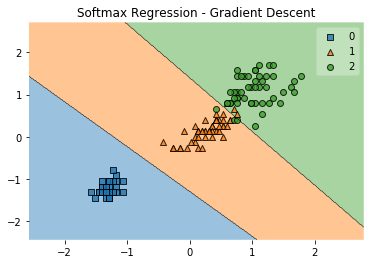

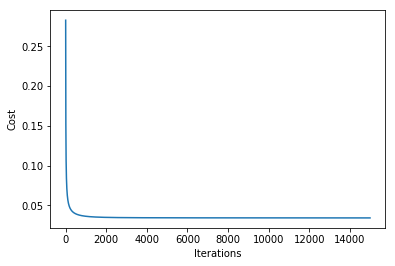

In [13]:
#Load Data
iris = sklearn.datasets.load_iris()
x = iris.data
y = iris.target


#!pip install mlxtend
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Loading Data

X, y = iris_data()
X = X[:, [2, 3]] # sepal length and petal width

# standardize
X[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

lr = SoftmaxRegression(eta=0.01, epochs=15000, minibatches=1, random_seed=0)
lr.fit(X, y)

plot_decision_regions(X, y, clf=lr)
plt.title('Softmax Regression - Gradient Descent')
plt.show()

plt.plot(range(len(lr.cost_)), lr.cost_)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

